In [460]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math
import random
from sklearn.manifold import TSNE
from torch.utils.data import Dataset, DataLoader
from sklearn.manifold import TSNE
import cv2

In [461]:
df_raw = pd.read_csv("seismic.csv", header=None)

df_raw.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,0.0,0,0.005633,0.006864,0.019389,0.018201,0.0,0.111111,0.000,0.142857,0.0,0,0,0,0,0.004975,0.00500,1
1,0,0.0,0,0.003063,0.006200,0.011186,0.019272,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0.000000,0.00000,1
2,0,0.0,0,0.011065,0.037422,0.054437,0.145610,0.0,0.111111,0.000,0.142857,0.0,0,0,0,0,0.007463,0.00750,1
3,0,0.0,0,0.004831,0.012179,0.024609,0.047109,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0.000000,0.00000,1
4,0,0.0,1,0.024527,0.042737,0.017151,0.033191,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0.000000,0.00000,1
5,0,0.0,1,0.080072,0.135518,0.067114,0.122056,0.0,0.222222,0.250,0.000000,0.0,0,0,0,0,0.002488,0.00175,1
6,0,0.0,0,0.018836,0.042516,0.051454,0.099572,0.0,0.111111,0.000,0.142857,0.0,0,0,0,0,0.009950,0.01000,1
7,0,0.0,0,0.038562,0.066652,0.111857,0.158458,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0.000000,0.00000,1
8,0,0.0,1,0.095363,0.149026,0.074571,0.129550,0.0,0.111111,0.125,0.000000,0.0,0,0,0,0,0.001244,0.00125,1
9,0,0.0,0,0.016124,0.029451,0.042506,0.064240,0.0,0.111111,0.000,0.142857,0.0,0,0,0,0,0.012438,0.01250,1


In [462]:
device = "cpu"

In [463]:
y = pd.get_dummies(df_raw.iloc[:,-1:].astype(str))

y.head(40)

,18_-1,18_1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [464]:
x = df_raw.iloc[:,:-1]

x = (x - x.min()) / (x.max() - x.min())

x.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.013931,0.009512,0.019389,0.018201,0.0,0.111111,0.000,0.142857,0.0,0.0,NaN,NaN,NaN,0.004975,0.00500
1,0.0,0.0,0.0,0.007575,0.008592,0.011186,0.019272,0.0,0.000000,0.000,0.000000,0.0,0.0,NaN,NaN,NaN,0.000000,0.00000
2,0.0,0.0,0.0,0.027366,0.051856,0.054437,0.145610,0.0,0.111111,0.000,0.142857,0.0,0.0,NaN,NaN,NaN,0.007463,0.00750
3,0.0,0.0,0.0,0.011949,0.016876,0.024609,0.047109,0.0,0.000000,0.000,0.000000,0.0,0.0,NaN,NaN,NaN,0.000000,0.00000
4,0.0,0.0,1.0,0.060659,0.059221,0.017151,0.033191,0.0,0.000000,0.000,0.000000,0.0,0.0,NaN,NaN,NaN,0.000000,0.00000
5,0.0,0.0,1.0,0.198031,0.187788,0.067114,0.122056,0.0,0.222222,0.250,0.000000,0.0,0.0,NaN,NaN,NaN,0.002488,0.00175
6,0.0,0.0,0.0,0.046585,0.058914,0.051454,0.099572,0.0,0.111111,0.000,0.142857,0.0,0.0,NaN,NaN,NaN,0.009950,0.01000
7,0.0,0.0,0.0,0.095371,0.092360,0.111857,0.158458,0.0,0.000000,0.000,0.000000,0.0,0.0,NaN,NaN,NaN,0.000000,0.00000
8,0.0,0.0,1.0,0.235850,0.206505,0.074571,0.129550,0.0,0.111111,0.125,0.000000,0.0,0.0,NaN,NaN,NaN,0.001244,0.00125
9,0.0,0.0,0.0,0.039877,0.040810,0.042506,0.064240,0.0,0.111111,0.000,0.142857,0.0,0.0,NaN,NaN,NaN,0.012438,0.01250


In [465]:
x_raw, x_test, y_raw, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

positive_count = y_raw['18_1'][y_raw['18_1'] == 1].count()
negative_count = y_raw['18_-1'][y_raw['18_-1'] == 1].count()

print("1: ", positive_count)
print("-1: ", negative_count)

to_generate = positive_count - negative_count
print("Goal: Data to Generate for -1 is", to_generate)

1:  1791
-1:  102
Goal: Data to Generate for -1 is 1689


In [466]:
x_missing = x_raw[y_raw['18_-1'] == 1]

In [467]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, num_features=17, num_dim=18):
        super(VariationalAutoencoder, self).__init__()
        
        self.num_features = num_features
        self.num_dim = num_dim
        
        self.encoder_layer_1 = nn.Linear(in_features=self.num_dim, out_features=9)
        self.encoder_layer_2 = nn.Linear(in_features=9, out_features=(self.num_features * 2))
        
        self.decoder_layer_1 = nn.Linear(in_features=self.num_features, out_features=9)
        self.decoder_layer_2 = nn.Linear(in_features=9, out_features=self.num_dim)
        
        self.relu = nn.LeakyReLU() # hidden layers
        self.sigmoid = nn.Sigmoid() # output layer
        
    def reparameterize(self, mu, log_var):
        """
        :param mu: mean from the encoder's latent space
        :param log_var: log variance from the encoder's latent space
        """
        std = torch.exp(0.5*log_var) # standard deviation
        eps = torch.randn_like(std)  # `randn_like` as we need the same size
        sample = mu + (eps * std)    # sampling as if coming from the input space
        
        return sample
    
    def encode(self, x):
        # encoding
        #x = F.relu(self.encoder_layer_1(x))
        x = self.encoder_layer_1(x)
        x = self.relu(x)
        x = self.encoder_layer_2(x).view(-1, 2, self.num_features)
        
        # get `mu` and `log_var`
        mu = x[:, 0, :] # the first feature values as mean
        log_var = x[:, 1, :] # the other feature values as variance
        
        # get the latent vector through reparameterization
        z = self.reparameterize(mu, log_var)
        
        return z, mu, log_var
    
    def decode(self, z, mu, log_var):
        # decoding
        #x = F.relu(self.decoder_layer_1(z))
        x = self.decoder_layer_1(z)
        x = self.relu(x)
        
        #reconstruction = torch.sigmoid(self.decoder_layer_2(x))
        reconstruction = self.decoder_layer_2(x)
        reconstruction = self.sigmoid(reconstruction)
        
        return reconstruction, mu, log_var
    
    # Utility function to generate new data based on:
    # mu: The average that you want to have (should be the same size as num_features)
    # log_var: The variance that you want to have (should be the same size as num_features)
    def sample(self, mu, log_var):
        z = self.reparameterize(mu, log_var)
        reconstruction, mu, log_var = self.decode(z, mu, log_var)
        
        return reconstruction
        
    
    def forward(self, x):
        z, mu, log_var = self.encode(x)
        reconstruction, mu, log_var = self.decode(z, mu, log_var)
        
        return reconstruction, mu, log_var

In [468]:
class AutoencoderDataset(Dataset):
    def __init__(self, x):
        self.x = x
        
    def __len__(self):
        return len(self.x)
    
    # Requires you to return data as a pair of _x, _y
    def __getitem__(self, index):
        return self.x[index], self.x[index]

In [469]:
def final_loss(bce_loss, mu, logvar):
    """
    This function will add the reconstruction loss (BCELoss) and the 
    KL-Divergence.
    KL-Divergence = 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    :param bce_loss: recontruction loss
    :param mu: the mean from the latent vector
    :param logvar: log variance from the latent vector
    """
    BCE = bce_loss 
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [470]:
num_features = 17
model = VariationalAutoencoder(num_features=num_features)

In [471]:
learning_rate = 0.001
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
batch_size = 5

In [472]:
# Define the training process
# Each call of the train function == 1 Epoch
def train_fn(loader, model, optimizer, loss_fn, batch_size):
    loop = tqdm(loader)
    
    count = 0
    ave_loss = 0.00
    
    # Loop per batch
    for batch_idx, (data, targets) in enumerate(loop):
        reconstruction, mu, logvar = model.forward(data)
        
        loss = loss_fn(reconstruction, targets)
        
        loss = final_loss(loss, mu, logvar)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        loop.set_postfix(loss=loss.item())
        
        ave_loss += loss.item()
        count += 1
        
    ave_loss = ave_loss / count
    
    return ave_loss

In [473]:
x_missing = torch.Tensor(np.array(x_missing))

# use Dataloader for Autoencoder 
custom_dataset = AutoencoderDataset(x_missing)

train_loader = DataLoader(
    custom_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

In [474]:
epochs = 100
losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    ave_loss = train_fn(
        train_loader,
        model,
        optimizer,
        loss_fn,
        batch_size
    )
    
    losses.append(ave_loss)
    
    print("Ave Loss: {}".format(ave_loss))
    
    state = { 'state_dict': model.state_dict() }

    # torch.save(state, "variational-autoencoder.pth")

Epoch: 0


100%|██████████| 21/21 [00:00<00:00, 139.07it/s, loss=nan]


Ave Loss: nan
Epoch: 1


100%|██████████| 21/21 [00:00<00:00, 308.81it/s, loss=nan]


Ave Loss: nan
Epoch: 2


100%|██████████| 21/21 [00:00<00:00, 323.08it/s, loss=nan]


Ave Loss: nan
Epoch: 3


100%|██████████| 21/21 [00:00<00:00, 333.28it/s, loss=nan]


Ave Loss: nan
Epoch: 4


100%|██████████| 21/21 [00:00<00:00, 262.51it/s, loss=nan]


Ave Loss: nan
Epoch: 5


100%|██████████| 21/21 [00:00<00:00, 235.96it/s, loss=nan]


Ave Loss: nan
Epoch: 6


100%|██████████| 21/21 [00:00<00:00, 228.27it/s, loss=nan]


Ave Loss: nan
Epoch: 7


100%|██████████| 21/21 [00:00<00:00, 233.35it/s, loss=nan]


Ave Loss: nan
Epoch: 8


100%|██████████| 21/21 [00:00<00:00, 187.50it/s, loss=nan]


Ave Loss: nan
Epoch: 9


100%|██████████| 21/21 [00:00<00:00, 200.00it/s, loss=nan]


Ave Loss: nan
Epoch: 10


100%|██████████| 21/21 [00:00<00:00, 229.33it/s, loss=nan]


Ave Loss: nan
Epoch: 11


100%|██████████| 21/21 [00:00<00:00, 385.25it/s, loss=nan]


Ave Loss: nan
Epoch: 12


100%|██████████| 21/21 [00:00<00:00, 276.31it/s, loss=nan]


Ave Loss: nan
Epoch: 13


100%|██████████| 21/21 [00:00<00:00, 280.00it/s, loss=nan]


Ave Loss: nan
Epoch: 14


100%|██████████| 21/21 [00:00<00:00, 256.10it/s, loss=nan]


Ave Loss: nan
Epoch: 15


100%|██████████| 21/21 [00:00<00:00, 250.03it/s, loss=nan]


Ave Loss: nan
Epoch: 16


100%|██████████| 21/21 [00:00<00:00, 300.01it/s, loss=nan]


Ave Loss: nan
Epoch: 17


100%|██████████| 21/21 [00:00<00:00, 338.72it/s, loss=nan]


Ave Loss: nan
Epoch: 18


100%|██████████| 21/21 [00:00<00:00, 368.42it/s, loss=nan]


Ave Loss: nan
Epoch: 19


100%|██████████| 21/21 [00:00<00:00, 388.89it/s, loss=nan]


Ave Loss: nan
Epoch: 20


100%|██████████| 21/21 [00:00<00:00, 363.27it/s, loss=nan]


Ave Loss: nan
Epoch: 21


100%|██████████| 21/21 [00:00<00:00, 329.85it/s, loss=nan]


Ave Loss: nan
Epoch: 22


100%|██████████| 21/21 [00:00<00:00, 290.28it/s, loss=nan]


Ave Loss: nan
Epoch: 23


100%|██████████| 21/21 [00:00<00:00, 241.51it/s, loss=nan]


Ave Loss: nan
Epoch: 24


100%|██████████| 21/21 [00:00<00:00, 279.99it/s, loss=nan]


Ave Loss: nan
Epoch: 25


100%|██████████| 21/21 [00:00<00:00, 320.47it/s, loss=nan]


Ave Loss: nan
Epoch: 26


100%|██████████| 21/21 [00:00<00:00, 388.89it/s, loss=nan]


Ave Loss: nan
Epoch: 27


100%|██████████| 21/21 [00:00<00:00, 403.85it/s, loss=nan]


Ave Loss: nan
Epoch: 28


100%|██████████| 21/21 [00:00<00:00, 350.06it/s, loss=nan]


Ave Loss: nan
Epoch: 29


100%|██████████| 21/21 [00:00<00:00, 299.97it/s, loss=nan]


Ave Loss: nan
Epoch: 30


100%|██████████| 21/21 [00:00<00:00, 304.37it/s, loss=nan]


Ave Loss: nan
Epoch: 31


100%|██████████| 21/21 [00:00<00:00, 323.09it/s, loss=nan]


Ave Loss: nan
Epoch: 32


100%|██████████| 21/21 [00:00<00:00, 333.33it/s, loss=nan]


Ave Loss: nan
Epoch: 33


100%|██████████| 21/21 [00:00<00:00, 318.19it/s, loss=nan]


Ave Loss: nan
Epoch: 34


100%|██████████| 21/21 [00:00<00:00, 250.02it/s, loss=nan]


Ave Loss: nan
Epoch: 35


100%|██████████| 21/21 [00:00<00:00, 299.99it/s, loss=nan]


Ave Loss: nan
Epoch: 36


100%|██████████| 21/21 [00:00<00:00, 313.43it/s, loss=nan]


Ave Loss: nan
Epoch: 37


100%|██████████| 21/21 [00:00<00:00, 300.01it/s, loss=nan]


Ave Loss: nan
Epoch: 38


100%|██████████| 21/21 [00:00<00:00, 300.01it/s, loss=nan]


Ave Loss: nan
Epoch: 39


100%|██████████| 21/21 [00:00<00:00, 228.26it/s, loss=nan]


Ave Loss: nan
Epoch: 40


100%|██████████| 21/21 [00:00<00:00, 249.60it/s, loss=nan]


Ave Loss: nan
Epoch: 41


100%|██████████| 21/21 [00:00<00:00, 248.55it/s, loss=nan]


Ave Loss: nan
Epoch: 42


100%|██████████| 21/21 [00:00<00:00, 355.86it/s, loss=nan]


Ave Loss: nan
Epoch: 43


100%|██████████| 21/21 [00:00<00:00, 333.32it/s, loss=nan]


Ave Loss: nan
Epoch: 44


100%|██████████| 21/21 [00:00<00:00, 338.71it/s, loss=nan]


Ave Loss: nan
Epoch: 45


100%|██████████| 21/21 [00:00<00:00, 388.90it/s, loss=nan]


Ave Loss: nan
Epoch: 46


100%|██████████| 21/21 [00:00<00:00, 411.76it/s, loss=nan]


Ave Loss: nan
Epoch: 47


100%|██████████| 21/21 [00:00<00:00, 411.77it/s, loss=nan]


Ave Loss: nan
Epoch: 48


100%|██████████| 21/21 [00:00<00:00, 411.54it/s, loss=nan]


Ave Loss: nan
Epoch: 49


100%|██████████| 21/21 [00:00<00:00, 190.90it/s, loss=nan]


Ave Loss: nan
Epoch: 50


100%|██████████| 21/21 [00:00<00:00, 250.00it/s, loss=nan]


Ave Loss: nan
Epoch: 51


100%|██████████| 21/21 [00:00<00:00, 308.84it/s, loss=nan]


Ave Loss: nan
Epoch: 52


100%|██████████| 21/21 [00:00<00:00, 313.44it/s, loss=nan]


Ave Loss: nan
Epoch: 53


100%|██████████| 21/21 [00:00<00:00, 362.17it/s, loss=nan]


Ave Loss: nan
Epoch: 54


100%|██████████| 21/21 [00:00<00:00, 381.83it/s, loss=nan]


Ave Loss: nan
Epoch: 55


100%|██████████| 21/21 [00:00<00:00, 388.89it/s, loss=nan]


Ave Loss: nan
Epoch: 56


100%|██████████| 21/21 [00:00<00:00, 388.86it/s, loss=nan]


Ave Loss: nan
Epoch: 57


100%|██████████| 21/21 [00:00<00:00, 375.00it/s, loss=nan]


Ave Loss: nan
Epoch: 58


100%|██████████| 21/21 [00:00<00:00, 396.23it/s, loss=nan]


Ave Loss: nan
Epoch: 59


100%|██████████| 21/21 [00:00<00:00, 403.72it/s, loss=nan]


Ave Loss: nan
Epoch: 60


100%|██████████| 21/21 [00:00<00:00, 375.02it/s, loss=nan]


Ave Loss: nan
Epoch: 61


100%|██████████| 21/21 [00:00<00:00, 411.76it/s, loss=nan]


Ave Loss: nan
Epoch: 62


100%|██████████| 21/21 [00:00<00:00, 411.61it/s, loss=nan]


Ave Loss: nan
Epoch: 63


100%|██████████| 21/21 [00:00<00:00, 388.88it/s, loss=nan]


Ave Loss: nan
Epoch: 64


100%|██████████| 21/21 [00:00<00:00, 403.86it/s, loss=nan]


Ave Loss: nan
Epoch: 65


100%|██████████| 21/21 [00:00<00:00, 374.90it/s, loss=nan]


Ave Loss: nan
Epoch: 66


100%|██████████| 21/21 [00:00<00:00, 374.99it/s, loss=nan]


Ave Loss: nan
Epoch: 67


100%|██████████| 21/21 [00:00<00:00, 368.42it/s, loss=nan]


Ave Loss: nan
Epoch: 68


100%|██████████| 21/21 [00:00<00:00, 338.72it/s, loss=nan]


Ave Loss: nan
Epoch: 69


100%|██████████| 21/21 [00:00<00:00, 323.07it/s, loss=nan]


Ave Loss: nan
Epoch: 70


100%|██████████| 21/21 [00:00<00:00, 420.01it/s, loss=nan]


Ave Loss: nan
Epoch: 71


100%|██████████| 21/21 [00:00<00:00, 396.23it/s, loss=nan]


Ave Loss: nan
Epoch: 72


100%|██████████| 21/21 [00:00<00:00, 403.82it/s, loss=nan]


Ave Loss: nan
Epoch: 73


100%|██████████| 21/21 [00:00<00:00, 223.41it/s, loss=nan]


Ave Loss: nan
Epoch: 74


100%|██████████| 21/21 [00:00<00:00, 272.73it/s, loss=nan]


Ave Loss: nan
Epoch: 75


100%|██████████| 21/21 [00:00<00:00, 362.04it/s, loss=nan]


Ave Loss: nan
Epoch: 76


100%|██████████| 21/21 [00:00<00:00, 388.77it/s, loss=nan]


Ave Loss: nan
Epoch: 77


100%|██████████| 21/21 [00:00<00:00, 388.88it/s, loss=nan]


Ave Loss: nan
Epoch: 78


100%|██████████| 21/21 [00:00<00:00, 411.78it/s, loss=nan]


Ave Loss: nan
Epoch: 79


100%|██████████| 21/21 [00:00<00:00, 388.77it/s, loss=nan]


Ave Loss: nan
Epoch: 80


100%|██████████| 21/21 [00:00<00:00, 411.76it/s, loss=nan]


Ave Loss: nan
Epoch: 81


100%|██████████| 21/21 [00:00<00:00, 375.00it/s, loss=nan]


Ave Loss: nan
Epoch: 82


100%|██████████| 21/21 [00:00<00:00, 368.42it/s, loss=nan]


Ave Loss: nan
Epoch: 83


100%|██████████| 21/21 [00:00<00:00, 381.82it/s, loss=nan]


Ave Loss: nan
Epoch: 84


100%|██████████| 21/21 [00:00<00:00, 396.24it/s, loss=nan]


Ave Loss: nan
Epoch: 85


100%|██████████| 21/21 [00:00<00:00, 437.51it/s, loss=nan]


Ave Loss: nan
Epoch: 86


100%|██████████| 21/21 [00:00<00:00, 437.49it/s, loss=nan]


Ave Loss: nan
Epoch: 87


100%|██████████| 21/21 [00:00<00:00, 396.23it/s, loss=nan]


Ave Loss: nan
Epoch: 88


100%|██████████| 21/21 [00:00<00:00, 388.90it/s, loss=nan]


Ave Loss: nan
Epoch: 89


100%|██████████| 21/21 [00:00<00:00, 403.85it/s, loss=nan]


Ave Loss: nan
Epoch: 90


100%|██████████| 21/21 [00:00<00:00, 411.78it/s, loss=nan]


Ave Loss: nan
Epoch: 91


100%|██████████| 21/21 [00:00<00:00, 396.13it/s, loss=nan]


Ave Loss: nan
Epoch: 92


100%|██████████| 21/21 [00:00<00:00, 411.62it/s, loss=nan]


Ave Loss: nan
Epoch: 93


100%|██████████| 21/21 [00:00<00:00, 381.83it/s, loss=nan]


Ave Loss: nan
Epoch: 94


100%|██████████| 21/21 [00:00<00:00, 411.62it/s, loss=nan]


Ave Loss: nan
Epoch: 95


100%|██████████| 21/21 [00:00<00:00, 437.42it/s, loss=nan]


Ave Loss: nan
Epoch: 96


100%|██████████| 21/21 [00:00<00:00, 419.99it/s, loss=nan]


Ave Loss: nan
Epoch: 97


100%|██████████| 21/21 [00:00<00:00, 428.34it/s, loss=nan]


Ave Loss: nan
Epoch: 98


100%|██████████| 21/21 [00:00<00:00, 381.78it/s, loss=nan]


Ave Loss: nan
Epoch: 99


100%|██████████| 21/21 [00:00<00:00, 371.17it/s, loss=nan]

Ave Loss: nan


In [475]:
# Create a vector of zero tensors representing 0 average per num_feature (right in the middle of the dist)
sampled_mu = torch.Tensor([np.zeros(num_features)])

# Create a vector of zero tensors representing 0 standard deviations away from the mean to create variations
# Change this is you want to sample away from the mean to create "off-quality" data
sampled_logvar = torch.Tensor([np.zeros(num_features)])

# print(sampled_logvar)

sampled_logvar.shape

torch.Size([1, 17])

In [476]:
# Grab a reconstructed sample from the trained model
# NOTE: reconstruction returns as an array because it's possible to have multiple predictions later on
reconstruction = model.sample(sampled_mu, sampled_logvar)
reconstruction

tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
       grad_fn=<SigmoidBackward0>)

In [477]:
x_fab = x_raw
x_fab

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1388,0.0,0.0,0.0,0.006803,0.089905,0.049963,0.087794,0.0,0.000000,0.000,0.000000,0.0,0.0,NaN,NaN,NaN,0.000000,0.0000
623,0.0,0.0,1.0,0.070349,0.028230,0.030574,0.021413,0.0,0.111111,0.000,0.142857,0.0,0.0,NaN,NaN,NaN,0.002488,0.0025
1716,0.0,0.0,0.0,0.002068,0.023320,0.010440,0.028908,0.0,0.000000,0.000,0.000000,0.0,0.0,NaN,NaN,NaN,0.000000,0.0000
1781,1.0,0.5,1.0,0.057543,0.241178,0.167785,0.177730,0.5,0.111111,0.125,0.000000,0.0,0.0,NaN,NaN,NaN,0.001493,0.0015
1443,1.0,0.5,1.0,0.018285,0.262964,0.033557,0.076017,0.0,0.111111,0.125,0.000000,0.0,0.0,NaN,NaN,NaN,0.000498,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,0.0,0.5,0.0,0.006994,0.039276,0.052200,0.056745,0.0,0.000000,0.000,0.000000,0.0,0.0,NaN,NaN,NaN,0.000000,0.0000
905,1.0,0.0,1.0,0.029453,0.156490,0.105145,0.110278,0.0,0.000000,0.000,0.000000,0.0,0.0,NaN,NaN,NaN,0.000000,0.0000
1096,0.0,0.5,1.0,0.018295,0.155569,0.116331,0.176660,0.5,0.000000,0.000,0.000000,0.0,0.0,NaN,NaN,NaN,0.000000,0.0000
235,0.0,0.0,1.0,0.101488,0.166922,0.090977,0.148822,0.0,0.666667,0.250,0.571429,0.0,0.0,NaN,NaN,NaN,0.051741,0.0175


In [478]:
added_negative_data = []

for i in range(to_generate):
    reconstruction = model.sample(sampled_mu, sampled_logvar)
    reconstruction = added_negative_data.append(reconstruction[0].detach().cpu().numpy())

col_name = [x for x in range(1, 19)]
x_added = pd.DataFrame(added_negative_data, columns=col_name)
x_added

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [479]:
col_name = ['18_1', '18_-1']

y_targets = [(0, 1) for x in range(to_generate)]
y_added = pd.DataFrame(y_targets, columns=col_name)

y_added

,18_1,18_-1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1684,0,1
1685,0,1
1686,0,1
1687,0,1


In [480]:
x_fab = pd.concat([x_fab, x_added])
x_fab

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1388,0.0,0.0,0.0,0.006803,0.089905,0.049963,0.087794,0.0,0.000000,0.000,0.000000,0.0,0.0,NaN,NaN,NaN,0.000000,0.0000,NaN
623,0.0,0.0,1.0,0.070349,0.028230,0.030574,0.021413,0.0,0.111111,0.000,0.142857,0.0,0.0,NaN,NaN,NaN,0.002488,0.0025,NaN
1716,0.0,0.0,0.0,0.002068,0.023320,0.010440,0.028908,0.0,0.000000,0.000,0.000000,0.0,0.0,NaN,NaN,NaN,0.000000,0.0000,NaN
1781,1.0,0.5,1.0,0.057543,0.241178,0.167785,0.177730,0.5,0.111111,0.125,0.000000,0.0,0.0,NaN,NaN,NaN,0.001493,0.0015,NaN
1443,1.0,0.5,1.0,0.018285,0.262964,0.033557,0.076017,0.0,0.111111,0.125,0.000000,0.0,0.0,NaN,NaN,NaN,0.000498,0.0005,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [481]:
y_fab = pd.concat([y_raw, y_added])
y_fab

,18_-1,18_1
1388,0,1
623,0,1
1716,0,1
1781,0,1
1443,0,1
...,...,...
1684,1,0
1685,1,0
1686,1,0
1687,1,0


In [482]:
x_raw =  torch.Tensor(x_raw.values)
x_fab =  torch.Tensor(x_fab.values)
x_test = torch.Tensor(x_test.values)

y_raw  = torch.Tensor(y_raw.values)
y_fab  = torch.Tensor(y_fab.values)

In [483]:
class NeuralNetwork(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        self.hidden_layer_1 = nn.Linear(self.in_dim, 20) # input to first hidden layer
        self.hidden_layer_2 = nn.Linear(20, 10)
        self.hidden_layer_3 = nn.Linear(10, 2)
        self.output_layer = nn.Linear(2, self.out_dim)
        self.activation = nn.Sigmoid()
    
    def forward(self, x):
        x = self.hidden_layer_1(x)
        x = self.activation(x)
        
        x = self.hidden_layer_2(x)
        x = self.activation(x)
        
        x = self.hidden_layer_3(x)
        x = self.activation(x)
        
        y = self.output_layer(x)
        y = self.activation(y)
        
        return y

In [484]:
model = NeuralNetwork(18, 2)

predictions = model.forward(x_raw)

predictions.shape

torch.Size([1893, 2])

In [485]:
learning_rate = 0.001
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
batch_size = 5

In [486]:
# Custom dataset to treat how the model picks an x, y combination from the dataset
class MyCustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    # Requires you to return data as a pair of _x, _y
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [487]:
# Define the training process
# Each call of the train function == 1 Epoch
def train_nn(loader, model, optimizer, loss_fn, batch_size):
    loop = tqdm(loader)
    
    count = 0
    ave_loss = 0.00
    
    # Loop per batch
    for batch_idx, (data, targets) in enumerate(loop):
        predictions = model.forward(data)
        
        loss = loss_fn(predictions, targets)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        loop.set_postfix(loss=loss.item())
        
        ave_loss += loss.item()
        count += 1
        
    ave_loss = ave_loss / count
    
    return ave_loss

In [488]:
custom_dataset = MyCustomDataset(x=x_raw, y=y_raw)

train_loader = DataLoader(
    custom_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

In [489]:
epochs = 100
losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    ave_loss = train_nn(
        train_loader,
        model,
        optimizer,
        loss_fn,
        batch_size
    )
    
    losses.append(ave_loss)
    
    print("Ave Loss: {}".format(ave_loss))
    
    state = { 'state_dict': model.state_dict() }

    # torch.save(state, "neural-network.pth")

Epoch: 0


100%|██████████| 379/379 [00:01<00:00, 335.46it/s, loss=nan]


Ave Loss: nan
Epoch: 1


100%|██████████| 379/379 [00:00<00:00, 410.65it/s, loss=nan]


Ave Loss: nan
Epoch: 2


100%|██████████| 379/379 [00:00<00:00, 449.05it/s, loss=nan]


Ave Loss: nan
Epoch: 3


100%|██████████| 379/379 [00:00<00:00, 379.56it/s, loss=nan]


Ave Loss: nan
Epoch: 4


100%|██████████| 379/379 [00:01<00:00, 348.01it/s, loss=nan]


Ave Loss: nan
Epoch: 5


100%|██████████| 379/379 [00:00<00:00, 410.48it/s, loss=nan]


Ave Loss: nan
Epoch: 6


100%|██████████| 379/379 [00:00<00:00, 431.17it/s, loss=nan]


Ave Loss: nan
Epoch: 7


100%|██████████| 379/379 [00:00<00:00, 448.52it/s, loss=nan]


Ave Loss: nan
Epoch: 8


100%|██████████| 379/379 [00:00<00:00, 390.15it/s, loss=nan]


Ave Loss: nan
Epoch: 9


100%|██████████| 379/379 [00:01<00:00, 332.98it/s, loss=nan]


Ave Loss: nan
Epoch: 10


100%|██████████| 379/379 [00:01<00:00, 369.59it/s, loss=nan]


Ave Loss: nan
Epoch: 11


100%|██████████| 379/379 [00:00<00:00, 416.94it/s, loss=nan]


Ave Loss: nan
Epoch: 12


100%|██████████| 379/379 [00:00<00:00, 407.53it/s, loss=nan]


Ave Loss: nan
Epoch: 13


100%|██████████| 379/379 [00:01<00:00, 372.97it/s, loss=nan]


Ave Loss: nan
Epoch: 14


100%|██████████| 379/379 [00:00<00:00, 402.32it/s, loss=nan]


Ave Loss: nan
Epoch: 15


100%|██████████| 379/379 [00:01<00:00, 322.71it/s, loss=nan]


Ave Loss: nan
Epoch: 16


100%|██████████| 379/379 [00:01<00:00, 340.52it/s, loss=nan]


Ave Loss: nan
Epoch: 17


100%|██████████| 379/379 [00:00<00:00, 389.12it/s, loss=nan]


Ave Loss: nan
Epoch: 18


100%|██████████| 379/379 [00:01<00:00, 350.52it/s, loss=nan]


Ave Loss: nan
Epoch: 19


100%|██████████| 379/379 [00:01<00:00, 349.77it/s, loss=nan]


Ave Loss: nan
Epoch: 20


100%|██████████| 379/379 [00:01<00:00, 350.30it/s, loss=nan]


Ave Loss: nan
Epoch: 21


100%|██████████| 379/379 [00:01<00:00, 266.34it/s, loss=nan]


Ave Loss: nan
Epoch: 22


100%|██████████| 379/379 [00:01<00:00, 291.33it/s, loss=nan]


Ave Loss: nan
Epoch: 23


100%|██████████| 379/379 [00:01<00:00, 300.11it/s, loss=nan]


Ave Loss: nan
Epoch: 24


100%|██████████| 379/379 [00:01<00:00, 309.67it/s, loss=nan]


Ave Loss: nan
Epoch: 25


100%|██████████| 379/379 [00:01<00:00, 275.24it/s, loss=nan]


Ave Loss: nan
Epoch: 26


100%|██████████| 379/379 [00:01<00:00, 231.13it/s, loss=nan]


Ave Loss: nan
Epoch: 27


100%|██████████| 379/379 [00:01<00:00, 227.62it/s, loss=nan]


Ave Loss: nan
Epoch: 28


100%|██████████| 379/379 [00:01<00:00, 273.35it/s, loss=nan]


Ave Loss: nan
Epoch: 29


100%|██████████| 379/379 [00:01<00:00, 236.03it/s, loss=nan]


Ave Loss: nan
Epoch: 30


100%|██████████| 379/379 [00:01<00:00, 293.98it/s, loss=nan]


Ave Loss: nan
Epoch: 31


100%|██████████| 379/379 [00:01<00:00, 319.47it/s, loss=nan]


Ave Loss: nan
Epoch: 32


100%|██████████| 379/379 [00:01<00:00, 337.79it/s, loss=nan]


Ave Loss: nan
Epoch: 33


100%|██████████| 379/379 [00:01<00:00, 330.14it/s, loss=nan]


Ave Loss: nan
Epoch: 34


100%|██████████| 379/379 [00:01<00:00, 338.40it/s, loss=nan]


Ave Loss: nan
Epoch: 35


100%|██████████| 379/379 [00:01<00:00, 368.12it/s, loss=nan]


Ave Loss: nan
Epoch: 36


100%|██████████| 379/379 [00:01<00:00, 366.18it/s, loss=nan]


Ave Loss: nan
Epoch: 37


100%|██████████| 379/379 [00:01<00:00, 377.65it/s, loss=nan]


Ave Loss: nan
Epoch: 38


100%|██████████| 379/379 [00:01<00:00, 341.99it/s, loss=nan]


Ave Loss: nan
Epoch: 39


100%|██████████| 379/379 [00:01<00:00, 244.48it/s, loss=nan]


Ave Loss: nan
Epoch: 40


100%|██████████| 379/379 [00:01<00:00, 370.84it/s, loss=nan]


Ave Loss: nan
Epoch: 41


100%|██████████| 379/379 [00:01<00:00, 334.51it/s, loss=nan]


Ave Loss: nan
Epoch: 42


100%|██████████| 379/379 [00:01<00:00, 369.50it/s, loss=nan]


Ave Loss: nan
Epoch: 43


100%|██████████| 379/379 [00:01<00:00, 314.68it/s, loss=nan]


Ave Loss: nan
Epoch: 44


100%|██████████| 379/379 [00:01<00:00, 322.51it/s, loss=nan]


Ave Loss: nan
Epoch: 45


100%|██████████| 379/379 [00:01<00:00, 325.60it/s, loss=nan]


Ave Loss: nan
Epoch: 46


100%|██████████| 379/379 [00:01<00:00, 302.79it/s, loss=nan]


Ave Loss: nan
Epoch: 47


100%|██████████| 379/379 [00:01<00:00, 337.58it/s, loss=nan]


Ave Loss: nan
Epoch: 48


100%|██████████| 379/379 [00:01<00:00, 323.80it/s, loss=nan]


Ave Loss: nan
Epoch: 49


100%|██████████| 379/379 [00:01<00:00, 321.73it/s, loss=nan]


Ave Loss: nan
Epoch: 50


100%|██████████| 379/379 [00:00<00:00, 423.46it/s, loss=nan]


Ave Loss: nan
Epoch: 51


100%|██████████| 379/379 [00:00<00:00, 426.80it/s, loss=nan]


Ave Loss: nan
Epoch: 52


100%|██████████| 379/379 [00:01<00:00, 295.23it/s, loss=nan]


Ave Loss: nan
Epoch: 53


100%|██████████| 379/379 [00:01<00:00, 303.07it/s, loss=nan]


Ave Loss: nan
Epoch: 54


100%|██████████| 379/379 [00:01<00:00, 280.33it/s, loss=nan]


Ave Loss: nan
Epoch: 55


100%|██████████| 379/379 [00:01<00:00, 276.15it/s, loss=nan]


Ave Loss: nan
Epoch: 56


100%|██████████| 379/379 [00:01<00:00, 257.78it/s, loss=nan]


Ave Loss: nan
Epoch: 57


100%|██████████| 379/379 [00:01<00:00, 238.66it/s, loss=nan]


Ave Loss: nan
Epoch: 58


100%|██████████| 379/379 [00:01<00:00, 279.98it/s, loss=nan]


Ave Loss: nan
Epoch: 59


100%|██████████| 379/379 [00:01<00:00, 256.72it/s, loss=nan]


Ave Loss: nan
Epoch: 60


100%|██████████| 379/379 [00:01<00:00, 235.95it/s, loss=nan]


Ave Loss: nan
Epoch: 61


100%|██████████| 379/379 [00:01<00:00, 258.89it/s, loss=nan]


Ave Loss: nan
Epoch: 62


100%|██████████| 379/379 [00:01<00:00, 263.73it/s, loss=nan]


Ave Loss: nan
Epoch: 63


100%|██████████| 379/379 [00:01<00:00, 301.99it/s, loss=nan]


Ave Loss: nan
Epoch: 64


100%|██████████| 379/379 [00:01<00:00, 302.96it/s, loss=nan]


Ave Loss: nan
Epoch: 65


100%|██████████| 379/379 [00:01<00:00, 288.79it/s, loss=nan]


Ave Loss: nan
Epoch: 66


100%|██████████| 379/379 [00:01<00:00, 265.15it/s, loss=nan]


Ave Loss: nan
Epoch: 67


100%|██████████| 379/379 [00:01<00:00, 282.70it/s, loss=nan]


Ave Loss: nan
Epoch: 68


100%|██████████| 379/379 [00:01<00:00, 317.54it/s, loss=nan]


Ave Loss: nan
Epoch: 69


100%|██████████| 379/379 [00:01<00:00, 231.91it/s, loss=nan]


Ave Loss: nan
Epoch: 70


100%|██████████| 379/379 [00:01<00:00, 276.70it/s, loss=nan]


Ave Loss: nan
Epoch: 71


100%|██████████| 379/379 [00:01<00:00, 289.31it/s, loss=nan]


Ave Loss: nan
Epoch: 72


100%|██████████| 379/379 [00:01<00:00, 291.39it/s, loss=nan]


Ave Loss: nan
Epoch: 73


100%|██████████| 379/379 [00:01<00:00, 242.93it/s, loss=nan]


Ave Loss: nan
Epoch: 74


100%|██████████| 379/379 [00:01<00:00, 286.71it/s, loss=nan]


Ave Loss: nan
Epoch: 75


100%|██████████| 379/379 [00:01<00:00, 299.60it/s, loss=nan]


Ave Loss: nan
Epoch: 76


100%|██████████| 379/379 [00:01<00:00, 287.13it/s, loss=nan]


Ave Loss: nan
Epoch: 77


100%|██████████| 379/379 [00:01<00:00, 210.43it/s, loss=nan]


Ave Loss: nan
Epoch: 78


100%|██████████| 379/379 [00:01<00:00, 230.50it/s, loss=nan]


Ave Loss: nan
Epoch: 79


100%|██████████| 379/379 [00:01<00:00, 315.27it/s, loss=nan]


Ave Loss: nan
Epoch: 80


100%|██████████| 379/379 [00:01<00:00, 268.32it/s, loss=nan]


Ave Loss: nan
Epoch: 81


100%|██████████| 379/379 [00:01<00:00, 282.96it/s, loss=nan]


Ave Loss: nan
Epoch: 82


100%|██████████| 379/379 [00:01<00:00, 324.49it/s, loss=nan]


Ave Loss: nan
Epoch: 83


100%|██████████| 379/379 [00:01<00:00, 305.61it/s, loss=nan]


Ave Loss: nan
Epoch: 84


100%|██████████| 379/379 [00:01<00:00, 329.91it/s, loss=nan]


Ave Loss: nan
Epoch: 85


100%|██████████| 379/379 [00:01<00:00, 318.68it/s, loss=nan]


Ave Loss: nan
Epoch: 86


100%|██████████| 379/379 [00:01<00:00, 307.58it/s, loss=nan]


Ave Loss: nan
Epoch: 87


100%|██████████| 379/379 [00:01<00:00, 340.92it/s, loss=nan]


Ave Loss: nan
Epoch: 88


100%|██████████| 379/379 [00:01<00:00, 331.64it/s, loss=nan]


Ave Loss: nan
Epoch: 89


100%|██████████| 379/379 [00:01<00:00, 323.21it/s, loss=nan]


Ave Loss: nan
Epoch: 90


100%|██████████| 379/379 [00:01<00:00, 345.47it/s, loss=nan]


Ave Loss: nan
Epoch: 91


100%|██████████| 379/379 [00:01<00:00, 365.13it/s, loss=nan]


Ave Loss: nan
Epoch: 92


100%|██████████| 379/379 [00:01<00:00, 353.01it/s, loss=nan]


Ave Loss: nan
Epoch: 93


100%|██████████| 379/379 [00:01<00:00, 299.72it/s, loss=nan]


Ave Loss: nan
Epoch: 94


100%|██████████| 379/379 [00:01<00:00, 297.72it/s, loss=nan]


Ave Loss: nan
Epoch: 95


100%|██████████| 379/379 [00:01<00:00, 265.78it/s, loss=nan]


Ave Loss: nan
Epoch: 96


100%|██████████| 379/379 [00:01<00:00, 281.36it/s, loss=nan]


Ave Loss: nan
Epoch: 97


100%|██████████| 379/379 [00:01<00:00, 307.62it/s, loss=nan]


Ave Loss: nan
Epoch: 98


100%|██████████| 379/379 [00:01<00:00, 310.63it/s, loss=nan]


Ave Loss: nan
Epoch: 99


100%|██████████| 379/379 [00:01<00:00, 327.57it/s, loss=nan]


Ave Loss: nan


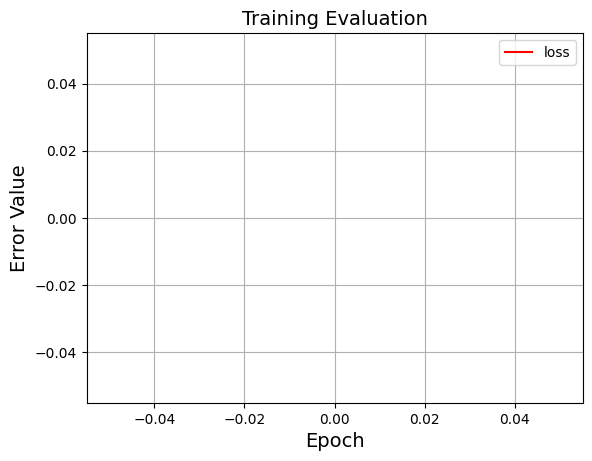

In [490]:
plt.plot(losses, label='loss', color='red')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Error Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [491]:
predictions = model.forward(x_test)
predictions = predictions.detach().cpu().numpy()

In [492]:
def reverse_ohe(preds):
    ohe = []

    for i in preds:
        if i[0] > i[1]:
            ohe.append([1, 0])
        else:
            ohe.append([0, 1])
    return ohe

preds = reverse_ohe(predictions)
preds = np.array(preds)
preds.shape

(474, 2)

In [493]:
print("Raw data accuracy: ", accuracy_score(y_test, preds))

Raw data accuracy:  0.9514767932489452


In [494]:
model = NeuralNetwork(19, 2)
custom_dataset = MyCustomDataset(x=x_fab, y=y_fab)

train_loader = DataLoader(
    custom_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

In [495]:
losses = []
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    ave_loss = train_nn(
        train_loader,
        model,
        optimizer,
        loss_fn,
        batch_size
    )
    
    losses.append(ave_loss)
    
    print("Ave Loss: {}".format(ave_loss))
    
    state = { 'state_dict': model.state_dict() }

    torch.save(state, "seismic_model.pth")

Epoch: 0


100%|██████████| 717/717 [00:02<00:00, 353.03it/s, loss=nan]


Ave Loss: nan
Epoch: 1


100%|██████████| 717/717 [00:02<00:00, 291.70it/s, loss=nan]


Ave Loss: nan
Epoch: 2


100%|██████████| 717/717 [00:02<00:00, 310.01it/s, loss=nan]


Ave Loss: nan
Epoch: 3


100%|██████████| 717/717 [00:02<00:00, 300.89it/s, loss=nan]


Ave Loss: nan
Epoch: 4


100%|██████████| 717/717 [00:02<00:00, 313.35it/s, loss=nan]


Ave Loss: nan
Epoch: 5


100%|██████████| 717/717 [00:02<00:00, 329.50it/s, loss=nan]


Ave Loss: nan
Epoch: 6


100%|██████████| 717/717 [00:02<00:00, 331.97it/s, loss=nan]


Ave Loss: nan
Epoch: 7


100%|██████████| 717/717 [00:02<00:00, 340.72it/s, loss=nan]


Ave Loss: nan
Epoch: 8


100%|██████████| 717/717 [00:02<00:00, 327.72it/s, loss=nan]


Ave Loss: nan
Epoch: 9


100%|██████████| 717/717 [00:02<00:00, 349.65it/s, loss=nan]


Ave Loss: nan
Epoch: 10


100%|██████████| 717/717 [00:02<00:00, 345.87it/s, loss=nan]


Ave Loss: nan
Epoch: 11


100%|██████████| 717/717 [00:02<00:00, 297.10it/s, loss=nan]


Ave Loss: nan
Epoch: 12


100%|██████████| 717/717 [00:02<00:00, 313.79it/s, loss=nan]


Ave Loss: nan
Epoch: 13


100%|██████████| 717/717 [00:02<00:00, 293.98it/s, loss=nan]


Ave Loss: nan
Epoch: 14


100%|██████████| 717/717 [00:02<00:00, 318.80it/s, loss=nan]


Ave Loss: nan
Epoch: 15


100%|██████████| 717/717 [00:02<00:00, 321.10it/s, loss=nan]


Ave Loss: nan
Epoch: 16


100%|██████████| 717/717 [00:01<00:00, 363.17it/s, loss=nan]


Ave Loss: nan
Epoch: 17


100%|██████████| 717/717 [00:01<00:00, 361.37it/s, loss=nan]


Ave Loss: nan
Epoch: 18


100%|██████████| 717/717 [00:02<00:00, 353.45it/s, loss=nan]


Ave Loss: nan
Epoch: 19


100%|██████████| 717/717 [00:02<00:00, 355.96it/s, loss=nan]


Ave Loss: nan
Epoch: 20


100%|██████████| 717/717 [00:02<00:00, 322.38it/s, loss=nan]


Ave Loss: nan
Epoch: 21


100%|██████████| 717/717 [00:02<00:00, 309.44it/s, loss=nan]


Ave Loss: nan
Epoch: 22


100%|██████████| 717/717 [00:02<00:00, 352.48it/s, loss=nan]


Ave Loss: nan
Epoch: 23


100%|██████████| 717/717 [00:02<00:00, 342.59it/s, loss=nan]


Ave Loss: nan
Epoch: 24


100%|██████████| 717/717 [00:02<00:00, 314.53it/s, loss=nan]


Ave Loss: nan
Epoch: 25


100%|██████████| 717/717 [00:02<00:00, 299.54it/s, loss=nan]


Ave Loss: nan
Epoch: 26


100%|██████████| 717/717 [00:02<00:00, 317.40it/s, loss=nan]


Ave Loss: nan
Epoch: 27


100%|██████████| 717/717 [00:02<00:00, 336.88it/s, loss=nan]


Ave Loss: nan
Epoch: 28


100%|██████████| 717/717 [00:02<00:00, 347.93it/s, loss=nan]


Ave Loss: nan
Epoch: 29


100%|██████████| 717/717 [00:02<00:00, 323.70it/s, loss=nan]


Ave Loss: nan
Epoch: 30


100%|██████████| 717/717 [00:02<00:00, 319.39it/s, loss=nan]


Ave Loss: nan
Epoch: 31


100%|██████████| 717/717 [00:02<00:00, 308.74it/s, loss=nan]


Ave Loss: nan
Epoch: 32


100%|██████████| 717/717 [00:02<00:00, 290.24it/s, loss=nan]


Ave Loss: nan
Epoch: 33


100%|██████████| 717/717 [00:02<00:00, 300.93it/s, loss=nan]


Ave Loss: nan
Epoch: 34


100%|██████████| 717/717 [00:02<00:00, 249.93it/s, loss=nan]


Ave Loss: nan
Epoch: 35


100%|██████████| 717/717 [00:02<00:00, 297.44it/s, loss=nan]


Ave Loss: nan
Epoch: 36


100%|██████████| 717/717 [00:02<00:00, 303.02it/s, loss=nan]


Ave Loss: nan
Epoch: 37


100%|██████████| 717/717 [00:02<00:00, 322.91it/s, loss=nan]


Ave Loss: nan
Epoch: 38


100%|██████████| 717/717 [00:02<00:00, 334.45it/s, loss=nan]


Ave Loss: nan
Epoch: 39


100%|██████████| 717/717 [00:02<00:00, 348.30it/s, loss=nan]


Ave Loss: nan
Epoch: 40


100%|██████████| 717/717 [00:02<00:00, 276.68it/s, loss=nan]


Ave Loss: nan
Epoch: 41


100%|██████████| 717/717 [00:02<00:00, 266.68it/s, loss=nan]


Ave Loss: nan
Epoch: 42


100%|██████████| 717/717 [00:02<00:00, 250.88it/s, loss=nan]


Ave Loss: nan
Epoch: 43


100%|██████████| 717/717 [00:03<00:00, 219.72it/s, loss=nan]


Ave Loss: nan
Epoch: 44


100%|██████████| 717/717 [00:02<00:00, 273.07it/s, loss=nan]


Ave Loss: nan
Epoch: 45


100%|██████████| 717/717 [00:02<00:00, 276.81it/s, loss=nan]


Ave Loss: nan
Epoch: 46


100%|██████████| 717/717 [00:02<00:00, 249.30it/s, loss=nan]


Ave Loss: nan
Epoch: 47


100%|██████████| 717/717 [00:02<00:00, 279.15it/s, loss=nan]


Ave Loss: nan
Epoch: 48


100%|██████████| 717/717 [00:02<00:00, 259.80it/s, loss=nan]


Ave Loss: nan
Epoch: 49


100%|██████████| 717/717 [00:02<00:00, 307.06it/s, loss=nan]


Ave Loss: nan
Epoch: 50


100%|██████████| 717/717 [00:02<00:00, 287.64it/s, loss=nan]


Ave Loss: nan
Epoch: 51


100%|██████████| 717/717 [00:02<00:00, 312.09it/s, loss=nan]


Ave Loss: nan
Epoch: 52


100%|██████████| 717/717 [00:02<00:00, 306.09it/s, loss=nan]


Ave Loss: nan
Epoch: 53


100%|██████████| 717/717 [00:02<00:00, 314.95it/s, loss=nan]


Ave Loss: nan
Epoch: 54


100%|██████████| 717/717 [00:02<00:00, 321.19it/s, loss=nan]


Ave Loss: nan
Epoch: 55


100%|██████████| 717/717 [00:02<00:00, 288.17it/s, loss=nan]


Ave Loss: nan
Epoch: 56


100%|██████████| 717/717 [00:02<00:00, 320.03it/s, loss=nan]


Ave Loss: nan
Epoch: 57


100%|██████████| 717/717 [00:02<00:00, 297.74it/s, loss=nan]


Ave Loss: nan
Epoch: 58


100%|██████████| 717/717 [00:02<00:00, 274.90it/s, loss=nan]


Ave Loss: nan
Epoch: 59


100%|██████████| 717/717 [00:02<00:00, 249.65it/s, loss=nan]


Ave Loss: nan
Epoch: 60


100%|██████████| 717/717 [00:02<00:00, 311.78it/s, loss=nan]


Ave Loss: nan
Epoch: 61


100%|██████████| 717/717 [00:02<00:00, 245.03it/s, loss=nan]


Ave Loss: nan
Epoch: 62


100%|██████████| 717/717 [00:02<00:00, 280.06it/s, loss=nan]


Ave Loss: nan
Epoch: 63


100%|██████████| 717/717 [00:02<00:00, 309.88it/s, loss=nan]


Ave Loss: nan
Epoch: 64


100%|██████████| 717/717 [00:02<00:00, 311.18it/s, loss=nan]


Ave Loss: nan
Epoch: 65


100%|██████████| 717/717 [00:02<00:00, 341.62it/s, loss=nan]


Ave Loss: nan
Epoch: 66


100%|██████████| 717/717 [00:02<00:00, 329.22it/s, loss=nan]


Ave Loss: nan
Epoch: 67


100%|██████████| 717/717 [00:02<00:00, 327.37it/s, loss=nan]


Ave Loss: nan
Epoch: 68


100%|██████████| 717/717 [00:02<00:00, 305.35it/s, loss=nan]


Ave Loss: nan
Epoch: 69


100%|██████████| 717/717 [00:02<00:00, 307.59it/s, loss=nan]


Ave Loss: nan
Epoch: 70


100%|██████████| 717/717 [00:02<00:00, 247.13it/s, loss=nan]


Ave Loss: nan
Epoch: 71


100%|██████████| 717/717 [00:02<00:00, 281.98it/s, loss=nan]


Ave Loss: nan
Epoch: 72


100%|██████████| 717/717 [00:02<00:00, 250.33it/s, loss=nan]


Ave Loss: nan
Epoch: 73


100%|██████████| 717/717 [00:02<00:00, 273.05it/s, loss=nan]


Ave Loss: nan
Epoch: 74


100%|██████████| 717/717 [00:02<00:00, 299.44it/s, loss=nan]


Ave Loss: nan
Epoch: 75


100%|██████████| 717/717 [00:02<00:00, 332.99it/s, loss=nan]


Ave Loss: nan
Epoch: 76


100%|██████████| 717/717 [00:02<00:00, 286.54it/s, loss=nan]


Ave Loss: nan
Epoch: 77


100%|██████████| 717/717 [00:02<00:00, 330.87it/s, loss=nan]


Ave Loss: nan
Epoch: 78


100%|██████████| 717/717 [00:02<00:00, 310.52it/s, loss=nan]


Ave Loss: nan
Epoch: 79


100%|██████████| 717/717 [00:02<00:00, 309.31it/s, loss=nan]


Ave Loss: nan
Epoch: 80


100%|██████████| 717/717 [00:02<00:00, 282.71it/s, loss=nan]


Ave Loss: nan
Epoch: 81


100%|██████████| 717/717 [00:02<00:00, 263.26it/s, loss=nan]


Ave Loss: nan
Epoch: 82


100%|██████████| 717/717 [00:02<00:00, 251.75it/s, loss=nan]


Ave Loss: nan
Epoch: 83


100%|██████████| 717/717 [00:02<00:00, 282.81it/s, loss=nan]


Ave Loss: nan
Epoch: 84


100%|██████████| 717/717 [00:02<00:00, 296.09it/s, loss=nan]


Ave Loss: nan
Epoch: 85


100%|██████████| 717/717 [00:02<00:00, 247.51it/s, loss=nan]


Ave Loss: nan
Epoch: 86


100%|██████████| 717/717 [00:03<00:00, 206.49it/s, loss=nan]


Ave Loss: nan
Epoch: 87


100%|██████████| 717/717 [00:03<00:00, 218.16it/s, loss=nan]


Ave Loss: nan
Epoch: 88


100%|██████████| 717/717 [00:02<00:00, 249.37it/s, loss=nan]


Ave Loss: nan
Epoch: 89


100%|██████████| 717/717 [00:03<00:00, 203.35it/s, loss=nan]


Ave Loss: nan
Epoch: 90


100%|██████████| 717/717 [00:02<00:00, 262.58it/s, loss=nan]


Ave Loss: nan
Epoch: 91


100%|██████████| 717/717 [00:02<00:00, 243.05it/s, loss=nan]


Ave Loss: nan
Epoch: 92


100%|██████████| 717/717 [00:03<00:00, 227.49it/s, loss=nan]


Ave Loss: nan
Epoch: 93


100%|██████████| 717/717 [00:03<00:00, 230.27it/s, loss=nan]


Ave Loss: nan
Epoch: 94


100%|██████████| 717/717 [00:02<00:00, 240.35it/s, loss=nan]


Ave Loss: nan
Epoch: 95


100%|██████████| 717/717 [00:03<00:00, 238.41it/s, loss=nan]


Ave Loss: nan
Epoch: 96


100%|██████████| 717/717 [00:02<00:00, 270.16it/s, loss=nan]


Ave Loss: nan
Epoch: 97


100%|██████████| 717/717 [00:02<00:00, 273.54it/s, loss=nan]


Ave Loss: nan
Epoch: 98


100%|██████████| 717/717 [00:02<00:00, 284.77it/s, loss=nan]


Ave Loss: nan
Epoch: 99


100%|██████████| 717/717 [00:02<00:00, 270.49it/s, loss=nan]

Ave Loss: nan


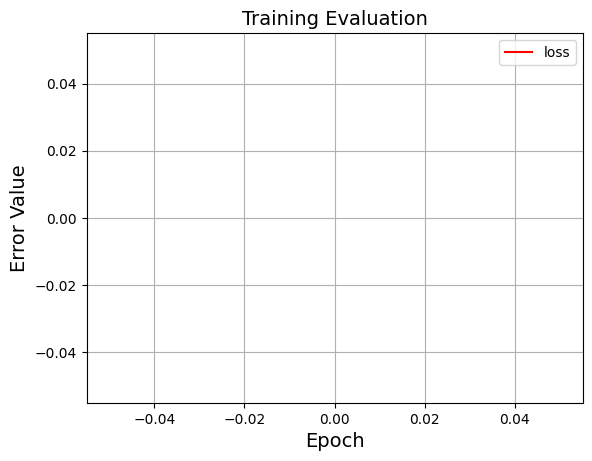

In [496]:
plt.plot(losses, label='loss', color='red')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Error Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()